# SALARIO MÉDIO DOS PROFISSIONAIS DE DADOS

***

# SOBRE

Os dados deste notebook foram coletados através de uma pesquisa realizada com profissionais de dados. Foram obtidas 473 respostas.

O formulário foi composto por 11 perguntas:

1. Em qual estado você reside?
2. Com qual gênero você se identifica?
3. Como você se auto-declara em relação a etinia/raça?
4. Faz parte da comunidade LGBTQIA+?
5. Qual sua formação atual?
6. Qual sua ocupação atual?
7. Qual sua faixa de salário bruto?
8. Qual seu modelo de trabalho?
9. Em geral, quantos colaboradores há na empresa em que você trabalha?
10. Qual o setor da empresa que você trabalha?
11. Sugestões

A pesquisa foi anônima e respostas muito específicas foram tratadas no dataset a fim de impossibilitar a identificação do respondente. As respostas dadas na questão número 11 (texto livre) também não foram disponibilizadas.

O dataset utilizado na análise se encontra disponível no mesmo repositório deste notebook.


# LIB'S

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


# HELPER FUNCTIONS

In [2]:
### Cria gráficos 
def grafico(data, col, t1, t2, t3, t4):
    
    plt.figure(figsize = (t1, t2))
    p = 1
    
    for f in df[col].unique():
        
            plt.subplot(t3, t4, p)
            
            aux = pd.DataFrame(df[df[col] == f]['salario'].value_counts())
            ax = sns.barplot(data = aux,
                  x = aux.index, y = 'salario', color = 'steelblue')
            plt.title(f)
            plt.xticks(rotation = 90)
            plt.tight_layout()
            
            for t, label in zip(ax.patches,round(pd.DataFrame(df[df['genero'] == f]['salario'].value_counts(normalize = True) * 100),2)['salario'].values):
                ax.annotate(label, (t.get_x() + 0.375, t.get_height() + 0.15))

            
            p += 1

            
            
            
### Cria uma tabela com a quantidade e percentual de respondentes por variável            
def tab1(col):
    qt = df[col].value_counts()
    perc = df[col].value_counts(normalize = True) * 100
    
    return pd.DataFrame({'Qtdade' : qt,
                        'Percent' : perc})



### Cria
def tab2(col):
    return pd.DataFrame(df[[ col,'salario']].value_counts()).sort_values(by=[col, 0], ascending = False).reset_index()

# DATASET

In [40]:
#df = pd.read_csv('../SalarioMedioProfissionaisDados.csv', sep = ',', encoding = 'utf-8')
df = pd.read_csv('../data.csv', sep = ',', encoding = 'utf-8')

In [41]:
df.shape

(462, 10)

In [42]:
df.head()

,Estado,Etnia/raça,Formação,Gênero,LGBTQIA+,Ocupação,Setor,Faixa Salarial,Tamanho da Empresa,Tipo contratação
0,Alagoas,Pessoa parda,Bacharelado/Tecnólogo/Licenciatura completo,Homem,Não,Analista,Tecnologia,"R$3.000,01 a R$4.000,00",101 - 500,Outros
1,Alagoas,Pessoa parda,Pós Graduação cursando/completo,Homem,Não,Especialista,Tecnologia,"R$7.000,01 a R$10.000,00",101 - 500,PJ
2,Amazonas,Pessoa branca,Bacharelado/Tecnólogo/Licenciatura cursando,Mulher,Sim,Analista,Comério / Varejo,"R$3.000,01 a R$4.000,00",Acima de 1001,CLT
3,Amazonas,Pessoa branca,Mestrado/Doutorado cursando/completo,Mulher,Não,Analista,Comério / Varejo,"R$5.000,01 a R$7.000,00",101 - 500,CLT
4,Amazonas,Pessoa parda,Bacharelado/Tecnólogo/Licenciatura cursando,Homem,Não,Analista,Tecnologia,"R$3.000,01 a R$4.000,00",21 - 50,CLT


# TRATAMENTO DOS DADOS

In [45]:
# renomeando as colunas
cols = ['uf', 'etnia', 'formacao', 'genero', 'lgbtqia', 
        'ocupacao', 'setor', 'salario', 'colab','model_trab']

df.columns = cols

In [46]:
# valores nulos
df.isna().sum()

uf            0
etnia         0
formacao      0
genero        0
lgbtqia       0
ocupacao      0
setor         0
salario       0
colab         0
model_trab    0
dtype: int64

In [47]:
# preenchendo nulo da variavel ref a salario
df['salario'] = df['salario'].fillna('0')

In [48]:
# Preenchendo as demais variáveis
df.fillna('NA', inplace = True)

In [49]:
# Substituindo caracteres (melhorar visualizacao)
df['salario'] = df['salario'].apply(lambda x: x.replace('R$', ''))

In [50]:
df['ocupacao'].value_counts()

Analista                       293
Especialista                    82
Jovem Aprendiz / Estagiário     26
Coordenador                     19
Auxiliar/Assistente             10
Eng. Dados                       7
Gerente                          6
Consultor                        6
Trainee                          4
Cientista de dados               3
Diretor                          2
Supervisor                       1
Não Respondeu                    1
Tech Lead                        1
DBA                              1
Name: ocupacao, dtype: int64

In [51]:
df['ocupacao'] = df['ocupacao'].apply(lambda x: x.title())

In [52]:
df['ocupacao'].value_counts()

Analista                       293
Especialista                    82
Jovem Aprendiz / Estagiário     26
Coordenador                     19
Auxiliar/Assistente             10
Eng. Dados                       7
Gerente                          6
Consultor                        6
Trainee                          4
Cientista De Dados               3
Diretor                          2
Supervisor                       1
Não Respondeu                    1
Tech Lead                        1
Dba                              1
Name: ocupacao, dtype: int64

# ANÁLISE EXPLORATÓRIA DE DADOS

### QUANTIDADE

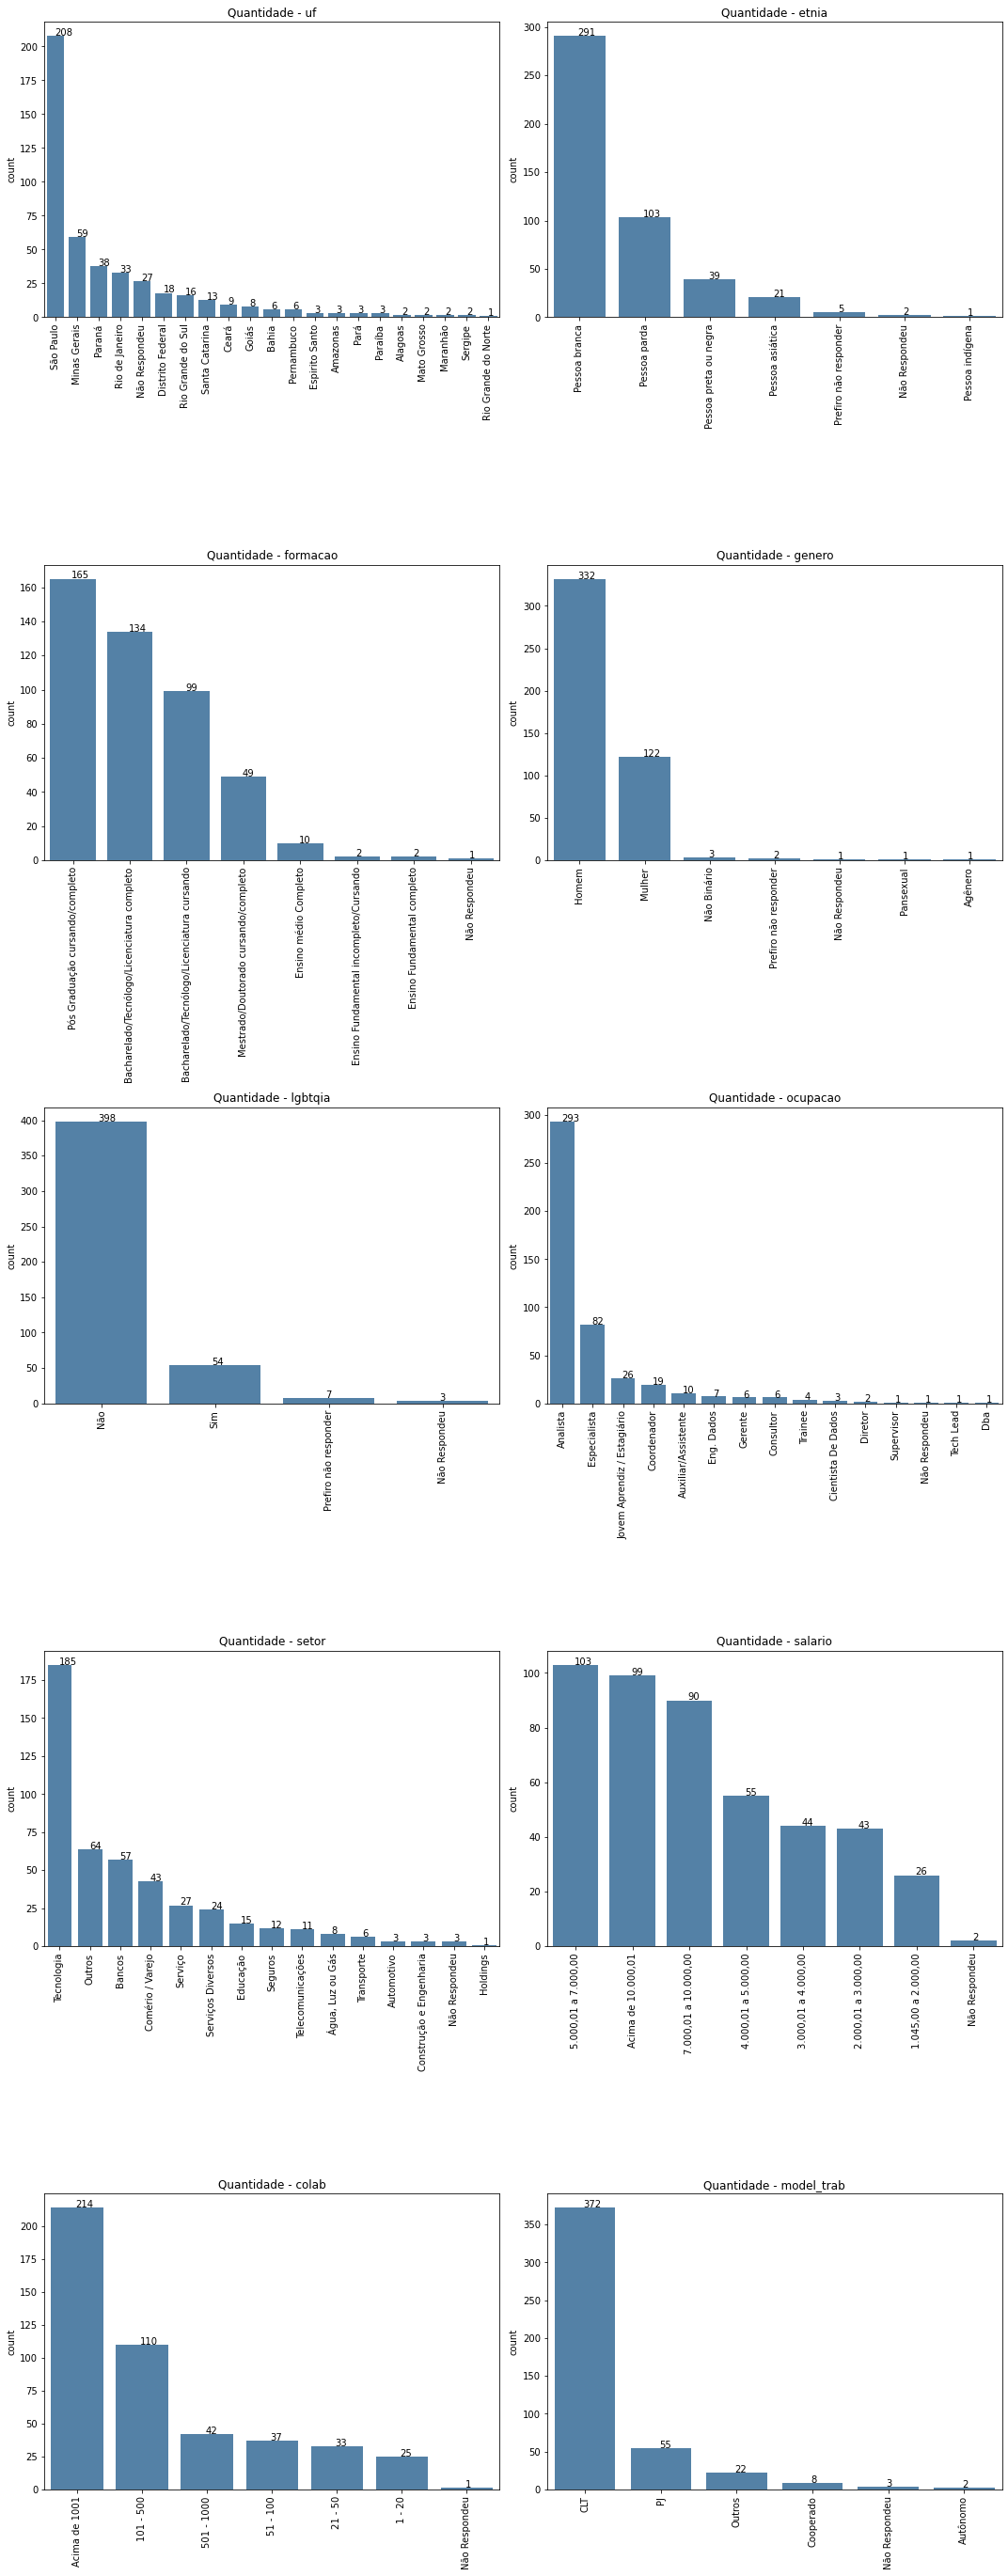

In [53]:
plt.figure(figsize = (15, 45))
x = 1

for f in df.columns:
    if f != 'data':
    
        plt.subplot( 6, 2, x)
        
        order = df[f].value_counts().index
        ax = sns.countplot(data = df, x = f, color = 'steelblue', order = order)
        plt.title('Quantidade - {}'.format(f))
        plt.xticks(rotation = 90)
        plt.tight_layout()
        plt.xlabel(None)
        
        for p, label in zip(ax.patches, df[f].value_counts().values):
            ax.annotate(label, (p.get_x() + 0.375, p.get_height() + 0.15))
        
        x += 1

### PERCENTUAL

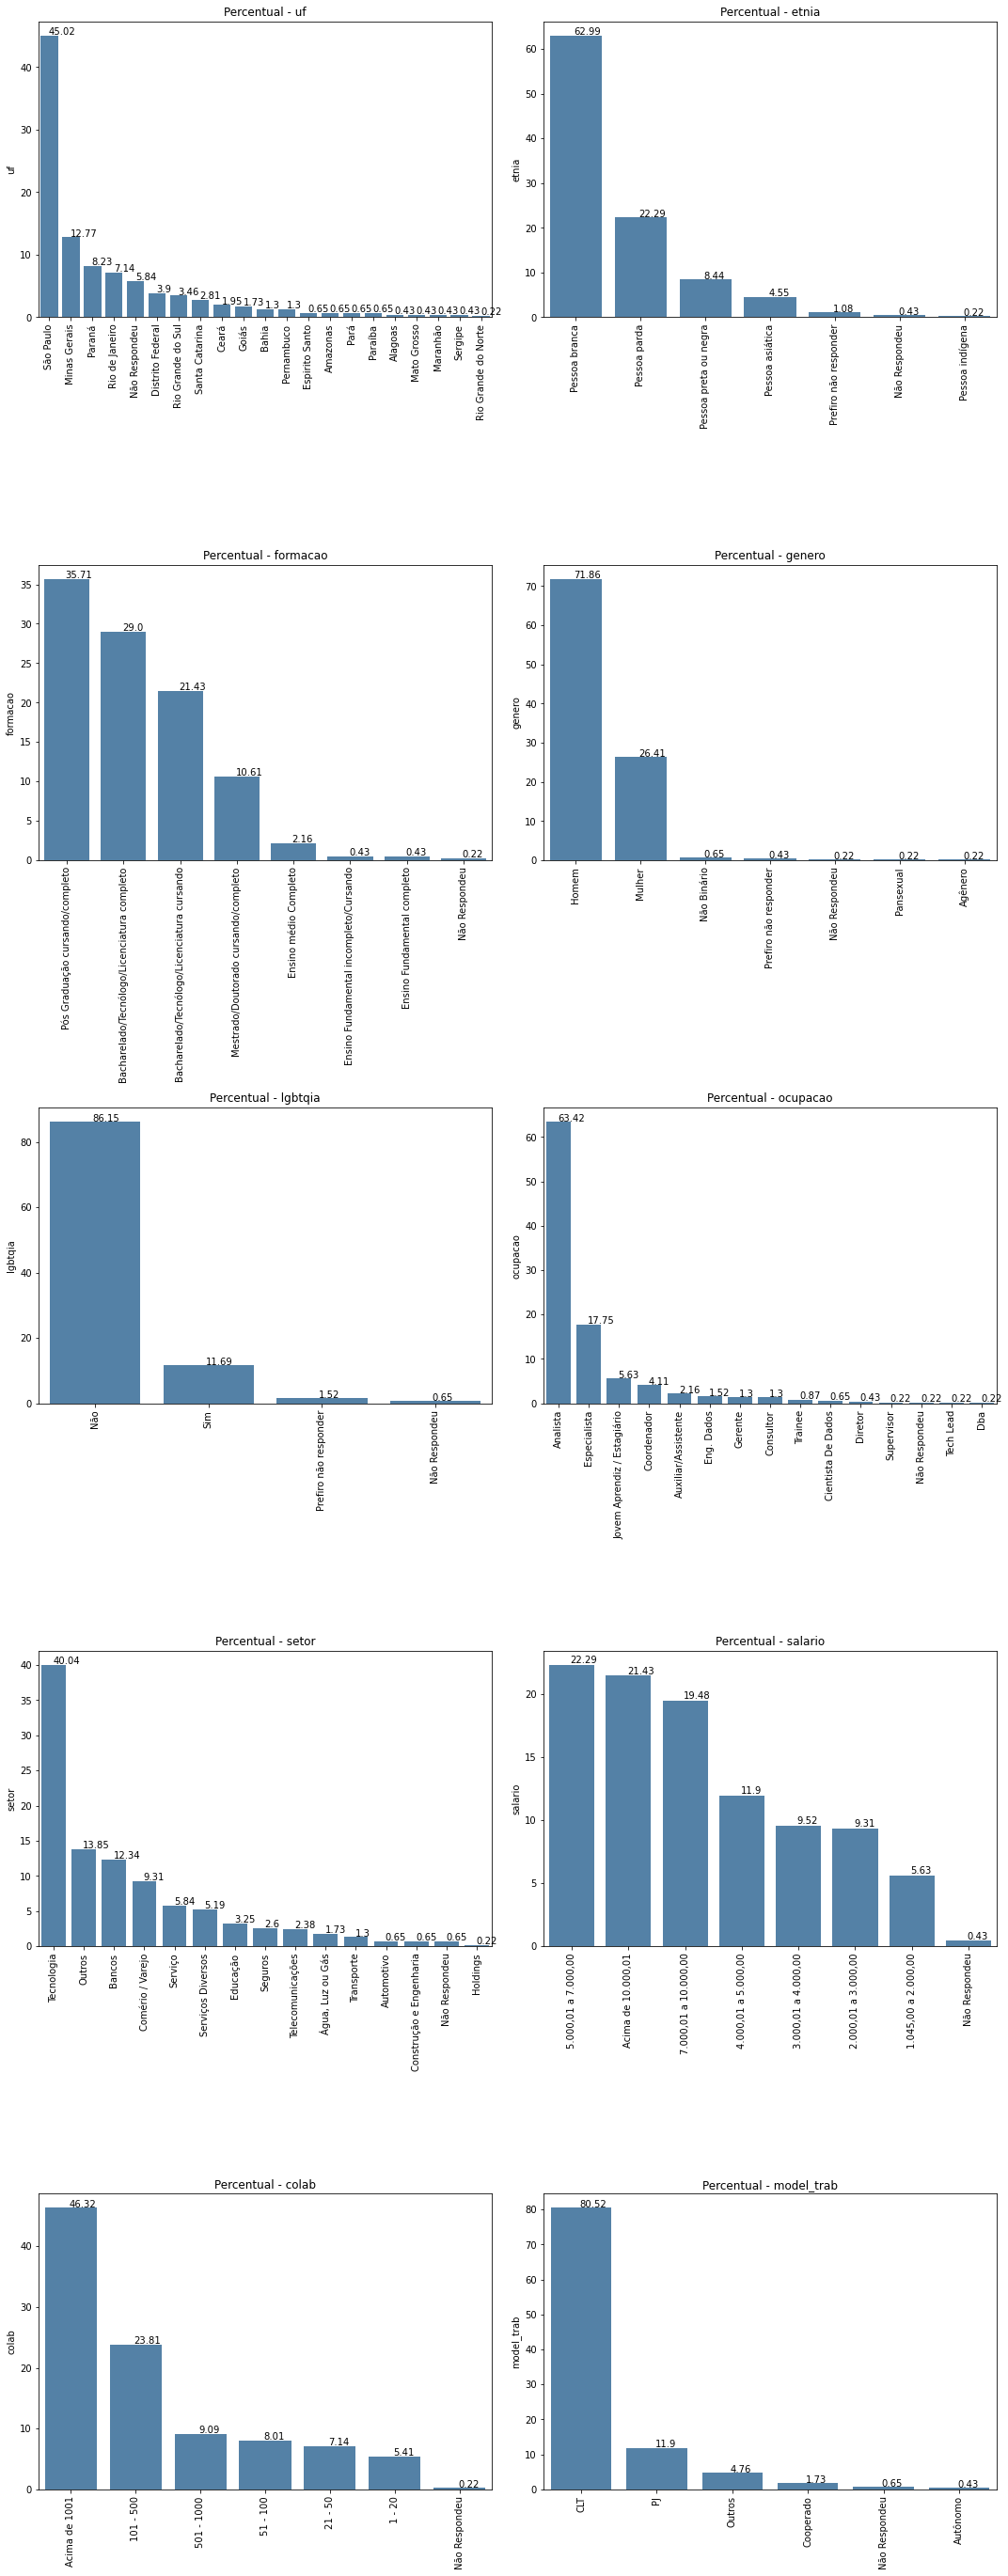

In [54]:
plt.figure(figsize = (15, 45))
x = 1

for f in df.columns:
    if f != 'data':
    
        plt.subplot( 6, 2, x)
        
        order = df[f].value_counts(normalize = True).index
        aux = pd.DataFrame(df[f].value_counts(normalize = True) * 100)
        ax = sns.barplot(data = aux, x = aux.index, y = f, color = 'steelblue', order = order)
        plt.title('Percentual - {}'.format(f))
        plt.xticks(rotation = 90)
        plt.tight_layout()
        plt.xlabel(None)
        
        for p, label in zip(ax.patches, round((df[f].value_counts(normalize = True) *100) ,2).values):
            ax.annotate(label, (p.get_x() + 0.375, p.get_height() + 0.15))
        
        x += 1

***

Respondentes

**1.** 45% dos respondentes residem em São Paulo

**2.** 63% se declaram como "pessoa branca", seguida por "pessoa parda" com 22%.

**3.** 36% já concluíram ou estão cursando pós graduação. Bacharelado, tecnólogo ou licenciatura se encontra na segunda posição de maior quantidade de respondentes, com 29%.

**4.** Mais de. 70% dos respondentes são do gênero masculino.

**5.** 12% pertencem a comunidade LGBTQIA+

**6.** 63% são analista, seguido por especialista com 18%.

**7.** 40% dos respondentes trabalham na área de tecnologia.

**8.** As três maiores faixas salariais são: 22% de 5k a 7k, 21% acima de 10k e 19% de 7k a 10k.

**9.** 46% dos respondentes trabalham em empresas com mais de mil funcionários. 23% em empresas entre 101 e 500 colaboradores.

**10.** 80% trabalham no regime CLT e 12% como PJ.

***

# ANÁLISE SALARIAL

## GÊNERO

In [55]:
qt = df['genero'].value_counts()
perc = df['genero'].value_counts(normalize = True) * 100

pd.DataFrame({'qtde' : qt,
             'perc' : perc})

,qtde,perc
Homem,332,71.861472
Mulher,122,26.406926
Não Binário,3,0.649351
Prefiro não responder,2,0.432900
Não Respondeu,1,0.216450
Pansexual,1,0.216450
Agênero,1,0.216450


In [56]:
pd.DataFrame(df[['genero', 'salario']].value_counts()).sort_values(by=['genero', 0], ascending = False)

0
genero                salario                 
Prefiro não responder Acima de 10.000,01     2
Pansexual             Acima de 10.000,01     1
Não Respondeu         Não Respondeu          1
Não Binário           5.000,01 a 7.000,00    1
                      7.000,01 a 10.000,00   1
                      Acima de 10.000,01     1
Mulher                5.000,01 a 7.000,00   36
                      7.000,01 a 10.000,00  18
                      4.000,01 a 5.000,00   15
                      Acima de 10.000,01    15
                      3.000,01 a 4.000,00   15
                      2.000,01 a 3.000,00   14
                      1.045,00 a 2.000,00    8
                      Não Respondeu          1
Homem                 Acima de 10.000,01    80
                      7.000,01 a 10.000,00  71
                      5.000,01 a 7.000,00   65
                      4.000,01 a 5.000,00   40
                      2.000,01 a 3.000,00   29
                      3.000,01 a 4.000,00   29
                      1.045,00 a 2.000,00   18
Agênero               5.000,01 a 7.000,00    1

In [57]:
pd.DataFrame(df[df['genero'] == 'Homem']['salario'].value_counts()).rename(columns=({'salario' : 'qt'}))

,qt
"Acima de 10.000,01",80
"7.000,01 a 10.000,00",71
"5.000,01 a 7.000,00",65
"4.000,01 a 5.000,00",40
"3.000,01 a 4.000,00",29
"2.000,01 a 3.000,00",29
"1.045,00 a 2.000,00",18


In [58]:
qt = df[df['genero'] == 'Homem']['salario'].value_counts()
perc = df[df['genero'] == 'Homem']['salario'].value_counts(normalize = True) * 100

print("\nGênero : 'Homem'")

pd.DataFrame({'qtde' : qt,
             'perc' : perc})




Gênero : 'Homem'


,qtde,perc
"Acima de 10.000,01",80,24.096386
"7.000,01 a 10.000,00",71,21.385542
"5.000,01 a 7.000,00",65,19.578313
"4.000,01 a 5.000,00",40,12.048193
"3.000,01 a 4.000,00",29,8.734940
"2.000,01 a 3.000,00",29,8.734940
"1.045,00 a 2.000,00",18,5.421687


In [59]:
qt = df[df['genero'] == 'Mulher']['salario'].value_counts()
perc = df[df['genero'] == 'Mulher']['salario'].value_counts(normalize = True) * 100

print("\nGênero : 'Mulher'")

pd.DataFrame({'qtde' : qt,
             'perc' : perc})




Gênero : 'Mulher'


,qtde,perc
"5.000,01 a 7.000,00",36,29.508197
"7.000,01 a 10.000,00",18,14.754098
"3.000,01 a 4.000,00",15,12.295082
"Acima de 10.000,01",15,12.295082
"4.000,01 a 5.000,00",15,12.295082
"2.000,01 a 3.000,00",14,11.475410
"1.045,00 a 2.000,00",8,6.557377
Não Respondeu,1,0.819672


***

Quando comparamos os respondentes por gênero, notamos significativa diferença salarial.
Dos respondentes que declaram gênero masculino, 24% recebem acima de 10 mil, seguido pelos que recebem entre 7 a 10mil, com 21%.

Dos respondentes que declararam gênero feminino, por sua vez, 29,5% recebem entre 5  - 7mil. A faixa salarial acima de 10 mil se encontra na 4 posição das respondentes, com apenas 12% (15 respostas)

***

## ETNIA

In [60]:
qt = df['etnia'].value_counts()
perc = df['etnia'].value_counts(normalize = True) * 100

pd.DataFrame({'qtde' : qt,
             'perc' : perc})

,qtde,perc
Pessoa branca,291,62.987013
Pessoa parda,103,22.294372
Pessoa preta ou negra,39,8.441558
Pessoa asiática,21,4.545455
Prefiro não responder,5,1.082251
Não Respondeu,2,0.432900
Pessoa indígena,1,0.216450


In [61]:
pd.DataFrame(df[['etnia', 'salario']].value_counts()).sort_values(by=['etnia', 0], ascending = False)

0
etnia                 salario                 
Prefiro não responder Acima de 10.000,01     2
                      1.045,00 a 2.000,00    1
                      5.000,01 a 7.000,00    1
                      7.000,01 a 10.000,00   1
Pessoa preta ou negra Acima de 10.000,01    12
                      7.000,01 a 10.000,00  11
                      5.000,01 a 7.000,00    5
                      4.000,01 a 5.000,00    4
                      2.000,01 a 3.000,00    4
                      3.000,01 a 4.000,00    2
                      1.045,00 a 2.000,00    1
Pessoa parda          Acima de 10.000,01    25
                      5.000,01 a 7.000,00   19
                      7.000,01 a 10.000,00  17
                      3.000,01 a 4.000,00   14
                      2.000,01 a 3.000,00   12
                      4.000,01 a 5.000,00   12
                      1.045,00 a 2.000,00    4
Pessoa indígena       5.000,01 a 7.000,00    1
Pessoa branca         5.000,01 a 7.000,00   71
                      7.000,01 a 10.000,00  57
                      Acima de 10.000,01    54
                      4.000,01 a 5.000,00   37
                      3.000,01 a 4.000,00   27
                      2.000,01 a 3.000,00   26
                      1.045,00 a 2.000,00   18
                      Não Respondeu          1
Pessoa asiática       Acima de 10.000,01     6
                      5.000,01 a 7.000,00    6
                      7.000,01 a 10.000,00   4
                      4.000,01 a 5.000,00    2
                      3.000,01 a 4.000,00    1
                      2.000,01 a 3.000,00    1
                      1.045,00 a 2.000,00    1
Não Respondeu         Não Respondeu          1
                      1.045,00 a 2.000,00    1

In [62]:
qt = df[df['etnia'] == 'Pessoa branca']['salario'].value_counts()
perc = df[df['etnia'] == 'Pessoa branca']['salario'].value_counts(normalize = True) * 100

print("\nEtnia : 'Pessoa branca'")

pd.DataFrame({'qtde' : qt,
             'perc' : perc})




Etnia : 'Pessoa branca'


,qtde,perc
"5.000,01 a 7.000,00",71,24.398625
"7.000,01 a 10.000,00",57,19.587629
"Acima de 10.000,01",54,18.556701
"4.000,01 a 5.000,00",37,12.714777
"3.000,01 a 4.000,00",27,9.278351
"2.000,01 a 3.000,00",26,8.934708
"1.045,00 a 2.000,00",18,6.185567
Não Respondeu,1,0.343643


In [63]:
qt = df[df['etnia'] == 'Pessoa parda']['salario'].value_counts()
perc = df[df['etnia'] == 'Pessoa parda']['salario'].value_counts(normalize = True) * 100

print("\nEtnia : 'Pessoa parda'")

pd.DataFrame({'qtde' : qt,
             'perc' : perc})




Etnia : 'Pessoa parda'


,qtde,perc
"Acima de 10.000,01",25,24.271845
"5.000,01 a 7.000,00",19,18.446602
"7.000,01 a 10.000,00",17,16.504854
"3.000,01 a 4.000,00",14,13.592233
"2.000,01 a 3.000,00",12,11.650485
"4.000,01 a 5.000,00",12,11.650485
"1.045,00 a 2.000,00",4,3.883495


In [64]:
qt = df[df['etnia'] == 'Pessoa preta ou negra']['salario'].value_counts()
perc = df[df['etnia'] == 'Pessoa preta ou negra']['salario'].value_counts(normalize = True) * 100

print("\nEtnia : 'Pessoa preta ou negra'")

pd.DataFrame({'qtde' : qt,
             'perc' : perc})




Etnia : 'Pessoa preta ou negra'


,qtde,perc
"Acima de 10.000,01",12,30.769231
"7.000,01 a 10.000,00",11,28.205128
"5.000,01 a 7.000,00",5,12.820513
"2.000,01 a 3.000,00",4,10.256410
"4.000,01 a 5.000,00",4,10.256410
"3.000,01 a 4.000,00",2,5.128205
"1.045,00 a 2.000,00",1,2.564103


In [65]:
qt = df[df['etnia'] == 'Pessoa asiática']['salario'].value_counts()
perc = df[df['etnia'] == 'Pessoa asiática']['salario'].value_counts(normalize = True) * 100

print("\nEtnia : 'Pessoa asiática'")

pd.DataFrame({'qtde' : qt,
             'perc' : perc})




Etnia : 'Pessoa asiática'


,qtde,perc
"5.000,01 a 7.000,00",6,28.571429
"Acima de 10.000,01",6,28.571429
"7.000,01 a 10.000,00",4,19.047619
"4.000,01 a 5.000,00",2,9.523810
"3.000,01 a 4.000,00",1,4.761905
"1.045,00 a 2.000,00",1,4.761905
"2.000,01 a 3.000,00",1,4.761905


As maiores faixas salariais agrupados por etnia são:

**Pessoa branca:**

25% de 5 a 7 k

20% de 7 a 10k

19% acima de 10k

<br>

**Pessoa parda:**

25% acima de 10k

18% de 5 a 7k

16% de 7 a 10k

<br>

**Pessoa preta ou negra:**

30% acima de 10k

28% de 7 a 10k

<br>

**Pessoa asiática**

28% de 5 a 7k

28% acima de 10k

19% de 7 a 10k

<br>

Vale ressaltar que 63% dos respondentes se declaram como pessoa branca, seguido por pessoa parda com 22% e pessoa negra com 8%. Outra observação importante é que de 473 respondentes, apenas 1 se declarou indígena.

## ORIENTAÇÃO SEXUAL

In [66]:
qt = df['lgbtqia'].value_counts()
perc = df['lgbtqia'].value_counts(normalize = True) * 100

pd.DataFrame({'qtde' : qt,
             'perc' : perc})

,qtde,perc
Não,398,86.147186
Sim,54,11.688312
Prefiro não responder,7,1.515152
Não Respondeu,3,0.649351


In [67]:
pd.DataFrame(df[['lgbtqia', 'salario']].value_counts()).sort_values(by=['lgbtqia', 0], ascending = False)

0
lgbtqia               salario                 
Sim                   7.000,01 a 10.000,00  11
                      5.000,01 a 7.000,00   11
                      4.000,01 a 5.000,00    9
                      2.000,01 a 3.000,00    8
                      Acima de 10.000,01     7
                      1.045,00 a 2.000,00    4
                      3.000,01 a 4.000,00    4
Prefiro não responder Acima de 10.000,01     4
                      2.000,01 a 3.000,00    2
                      1.045,00 a 2.000,00    1
Não Respondeu         5.000,01 a 7.000,00    1
                      1.045,00 a 2.000,00    1
                      Não Respondeu          1
Não                   5.000,01 a 7.000,00   91
                      Acima de 10.000,01    88
                      7.000,01 a 10.000,00  79
                      4.000,01 a 5.000,00   46
                      3.000,01 a 4.000,00   40
                      2.000,01 a 3.000,00   33
                      1.045,00 a 2.000,00   20
                      Não Respondeu          1

In [68]:
qt = df[df['lgbtqia'] == 'Não']['salario'].value_counts()
perc = df[df['lgbtqia'] == 'Não']['salario'].value_counts(normalize = True) * 100

print("\n LGBTQIA+ : 'Não'")

pd.DataFrame({'qtde' : qt,
             'perc' : perc})




 LGBTQIA+ : 'Não'


,qtde,perc
"5.000,01 a 7.000,00",91,22.864322
"Acima de 10.000,01",88,22.110553
"7.000,01 a 10.000,00",79,19.849246
"4.000,01 a 5.000,00",46,11.557789
"3.000,01 a 4.000,00",40,10.050251
"2.000,01 a 3.000,00",33,8.291457
"1.045,00 a 2.000,00",20,5.025126
Não Respondeu,1,0.251256


In [69]:
qt = df[df['lgbtqia'] == 'Sim']['salario'].value_counts()
perc = df[df['lgbtqia'] == 'Sim']['salario'].value_counts(normalize = True) * 100

print("\n LGBTQIA+ : 'Sim'")

pd.DataFrame({'qtde' : qt,
             'perc' : perc})




 LGBTQIA+ : 'Sim'


,qtde,perc
"7.000,01 a 10.000,00",11,20.370370
"5.000,01 a 7.000,00",11,20.370370
"4.000,01 a 5.000,00",9,16.666667
"2.000,01 a 3.000,00",8,14.814815
"Acima de 10.000,01",7,12.962963
"3.000,01 a 4.000,00",4,7.407407
"1.045,00 a 2.000,00",4,7.407407


Os respondentes que pertencem a comunidade LGBTQIA+:

20% entre 7 - 10k

20% entre 5 - 7k

17% de 4 - 5k

<br>

Os não pertencentes a comunidade LGBTQIA+:

23% entre 5 - 7k

22% acima de 10k

20% entre 7 a 10k

<br>

Apenas 13% das respostas que afirmam pertencer a comunidade LGBTQIA+ recebem mais de 10k, enquanto este número é de 22% dos respondentes que afirmam não pertencer.

## FORMAÇÃO

In [70]:
qt = df['formacao'].value_counts()
perc = df['formacao'].value_counts(normalize = True) * 100

pd.DataFrame({'qtde' : qt,
             'perc' : perc})

,qtde,perc
Pós Graduação cursando/completo,165,35.714286
Bacharelado/Tecnólogo/Licenciatura completo,134,29.004329
Bacharelado/Tecnólogo/Licenciatura cursando,99,21.428571
Mestrado/Doutorado cursando/completo,49,10.606061
Ensino médio Completo,10,2.164502
Ensino Fundamental incompleto/Cursando,2,0.432900
Ensino Fundamental completo,2,0.432900
Não Respondeu,1,0.216450


In [71]:
pd.DataFrame(df[['formacao', 'salario']].value_counts()).sort_values(by=['formacao', 0], ascending = False)

0
formacao                                    salario                 
Pós Graduação cursando/completo             Acima de 10.000,01    48
                                            5.000,01 a 7.000,00   41
                                            7.000,01 a 10.000,00  30
                                            4.000,01 a 5.000,00   19
                                            3.000,01 a 4.000,00   16
                                            2.000,01 a 3.000,00    8
                                            1.045,00 a 2.000,00    3
Não Respondeu                               Não Respondeu          1
Mestrado/Doutorado cursando/completo        Acima de 10.000,01    16
                                            5.000,01 a 7.000,00   12
                                            7.000,01 a 10.000,00  11
                                            4.000,01 a 5.000,00    6
                                            3.000,01 a 4.000,00    3
                                            2.000,01 a 3.000,00    1
Ensino médio Completo                       5.000,01 a 7.000,00    3
                                            Acima de 10.000,01     2
                                            7.000,01 a 10.000,00   2
                                            2.000,01 a 3.000,00    2
                                            1.045,00 a 2.000,00    1
Ensino Fundamental incompleto/Cursando      Acima de 10.000,01     1
                                            1.045,00 a 2.000,00    1
Ensino Fundamental completo                 Acima de 10.000,01     2
Bacharelado/Tecnólogo/Licenciatura cursando 1.045,00 a 2.000,00   17
                                            2.000,01 a 3.000,00   16
                                            7.000,01 a 10.000,00  16
                                            4.000,01 a 5.000,00   15
                                            5.000,01 a 7.000,00   14
                                            3.000,01 a 4.000,00   12
                                            Acima de 10.000,01     8
                                            Não Respondeu          1
Bacharelado/Tecnólogo/Licenciatura completo 5.000,01 a 7.000,00   33
                                            7.000,01 a 10.000,00  31
                                            Acima de 10.000,01    22
                                            2.000,01 a 3.000,00   16
                                            4.000,01 a 5.000,00   15
                                            3.000,01 a 4.000,00   13
                                            1.045,00 a 2.000,00    4

In [72]:
qt = df[df['formacao'] == 'Pós Graduação cursando/completo']['salario'].value_counts()
perc = df[df['formacao'] == 'Pós Graduação cursando/completo']['salario'].value_counts(normalize = True) * 100

print("\n Formacao : 'Não'")

pd.DataFrame({'qtde' : qt,
             'perc' : perc})




 Formacao : 'Não'


,qtde,perc
"Acima de 10.000,01",48,29.090909
"5.000,01 a 7.000,00",41,24.848485
"7.000,01 a 10.000,00",30,18.181818
"4.000,01 a 5.000,00",19,11.515152
"3.000,01 a 4.000,00",16,9.696970
"2.000,01 a 3.000,00",8,4.848485
"1.045,00 a 2.000,00",3,1.818182


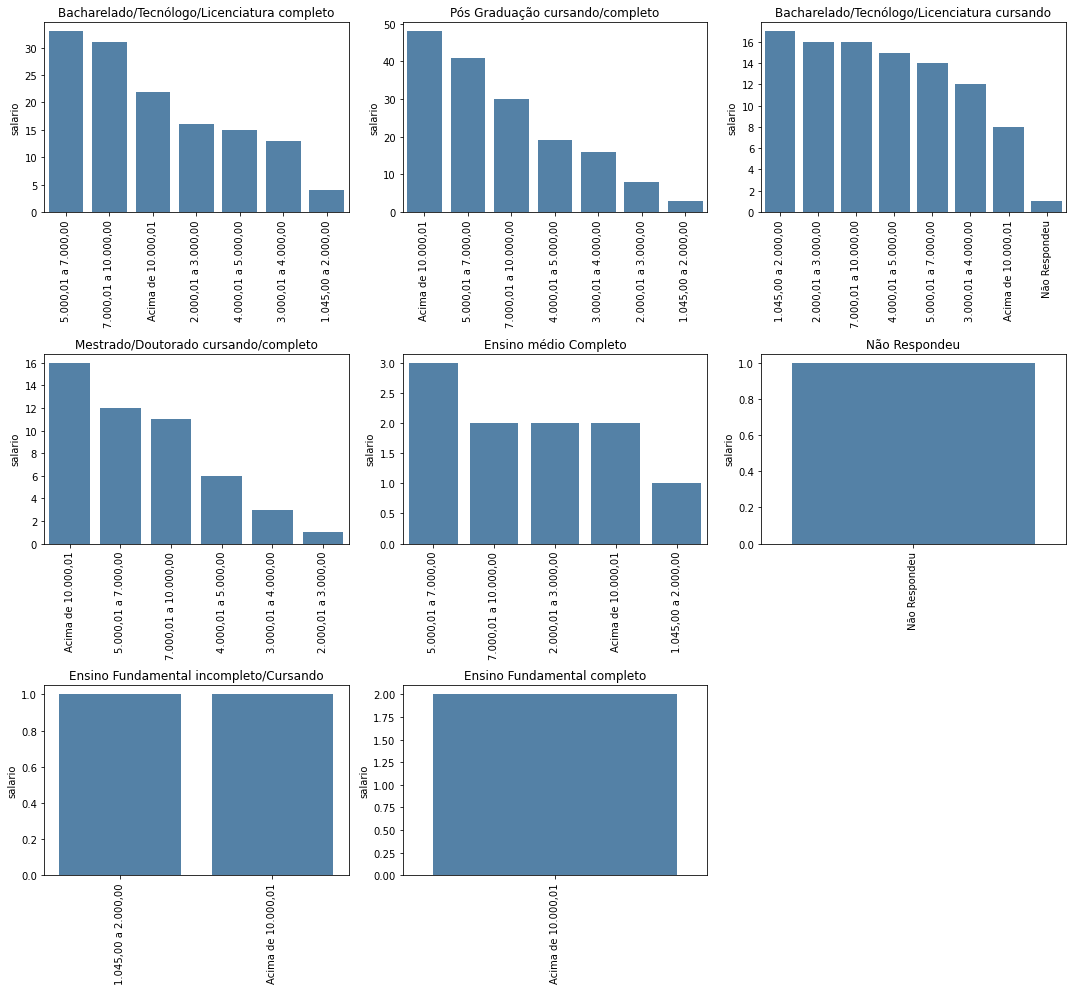

In [73]:
grafico(df, 'formacao', 15, 40, 9, 3)

Em relação a formação, a maior quantidade de respondentes é:

- Pós Graduação cursando/completo	com 165 respondentes (36%)

- Bacharelado/Tecnólogo/Licenciatura completo	com 134 respondentes (29%)

- Bacharelado/Tecnólogo/Licenciatura cursando	com 99 respondentes	(21%)

- Mestrado/Doutorado cursando/completo com 49	respondentes (11%)

Destes quatro grupos, pessoas com pós graduação estão concentradas, principalmente, com salários acima de 10mil e entre 5 e 7mil.

Dos respondentes que concluíram o ensino superior, o maior grupo recebe salários entre 5 e 7mil, seguido por 7 e 10mil (33 e 31 respondentes, respectivamente).

Já os que estão cursando, responderam em maior quantidade: 1.045,00 - 2k, de 2k a 3k, de 7k a 10k e de 4 a 5k.

Os respondentes que cursam ou concluíram mestrado ou doutorado recebem, na maior parte, acima de 10k seguido pelos que recebem de 5 a 7k e de 7 a 10k.

Embora as faixas salariais se encontrem bastante "divididas", é possível notar que os respondentes que declararam pós graduação ou mestrado/doutorado concentram a maior quantidade também de salários maiores.



## UF

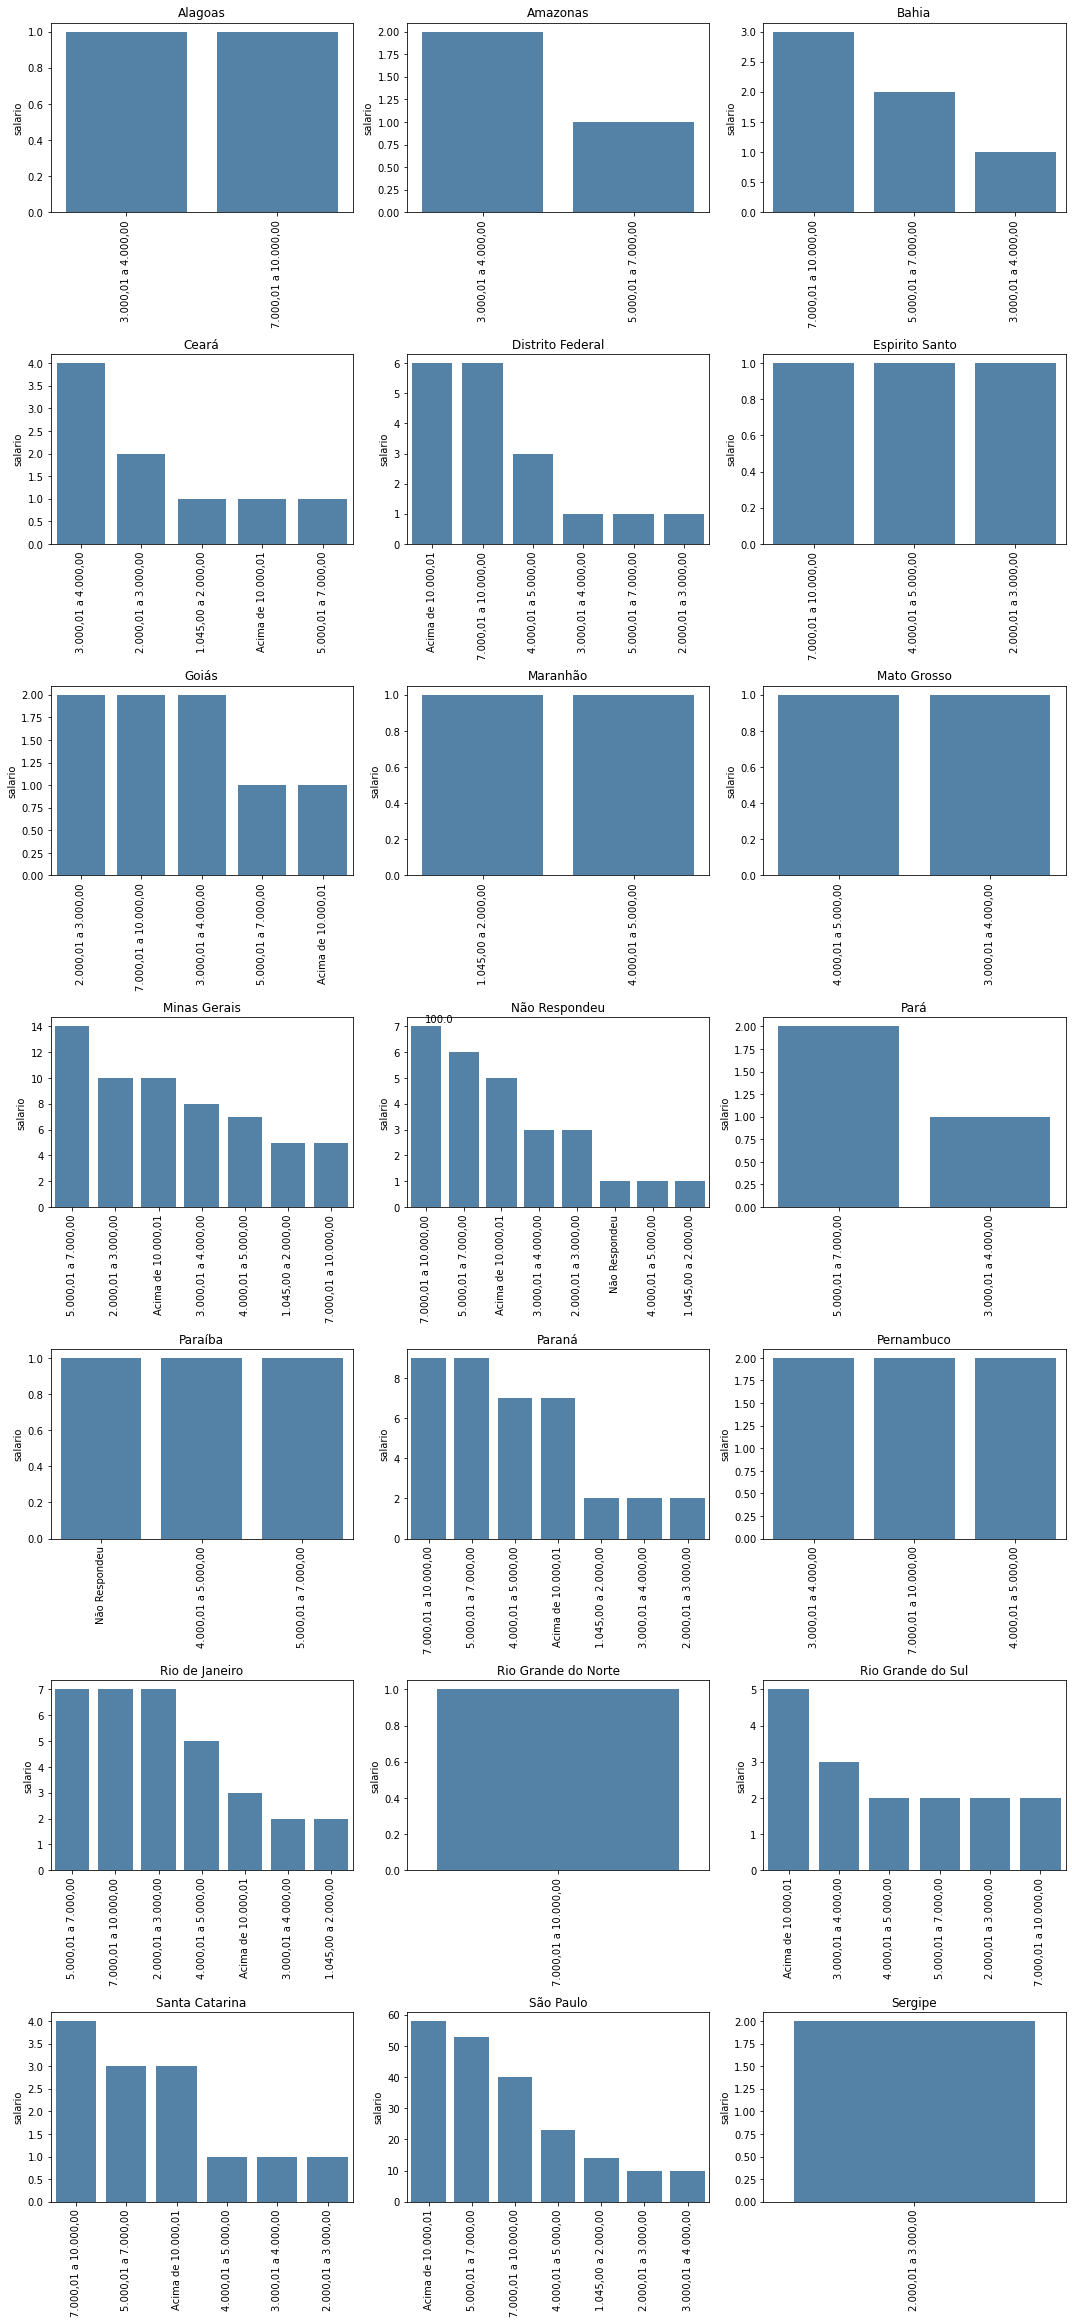

In [74]:
grafico(df, 'uf', 15, 40, 9, 3)

## OCUPAÇÃO

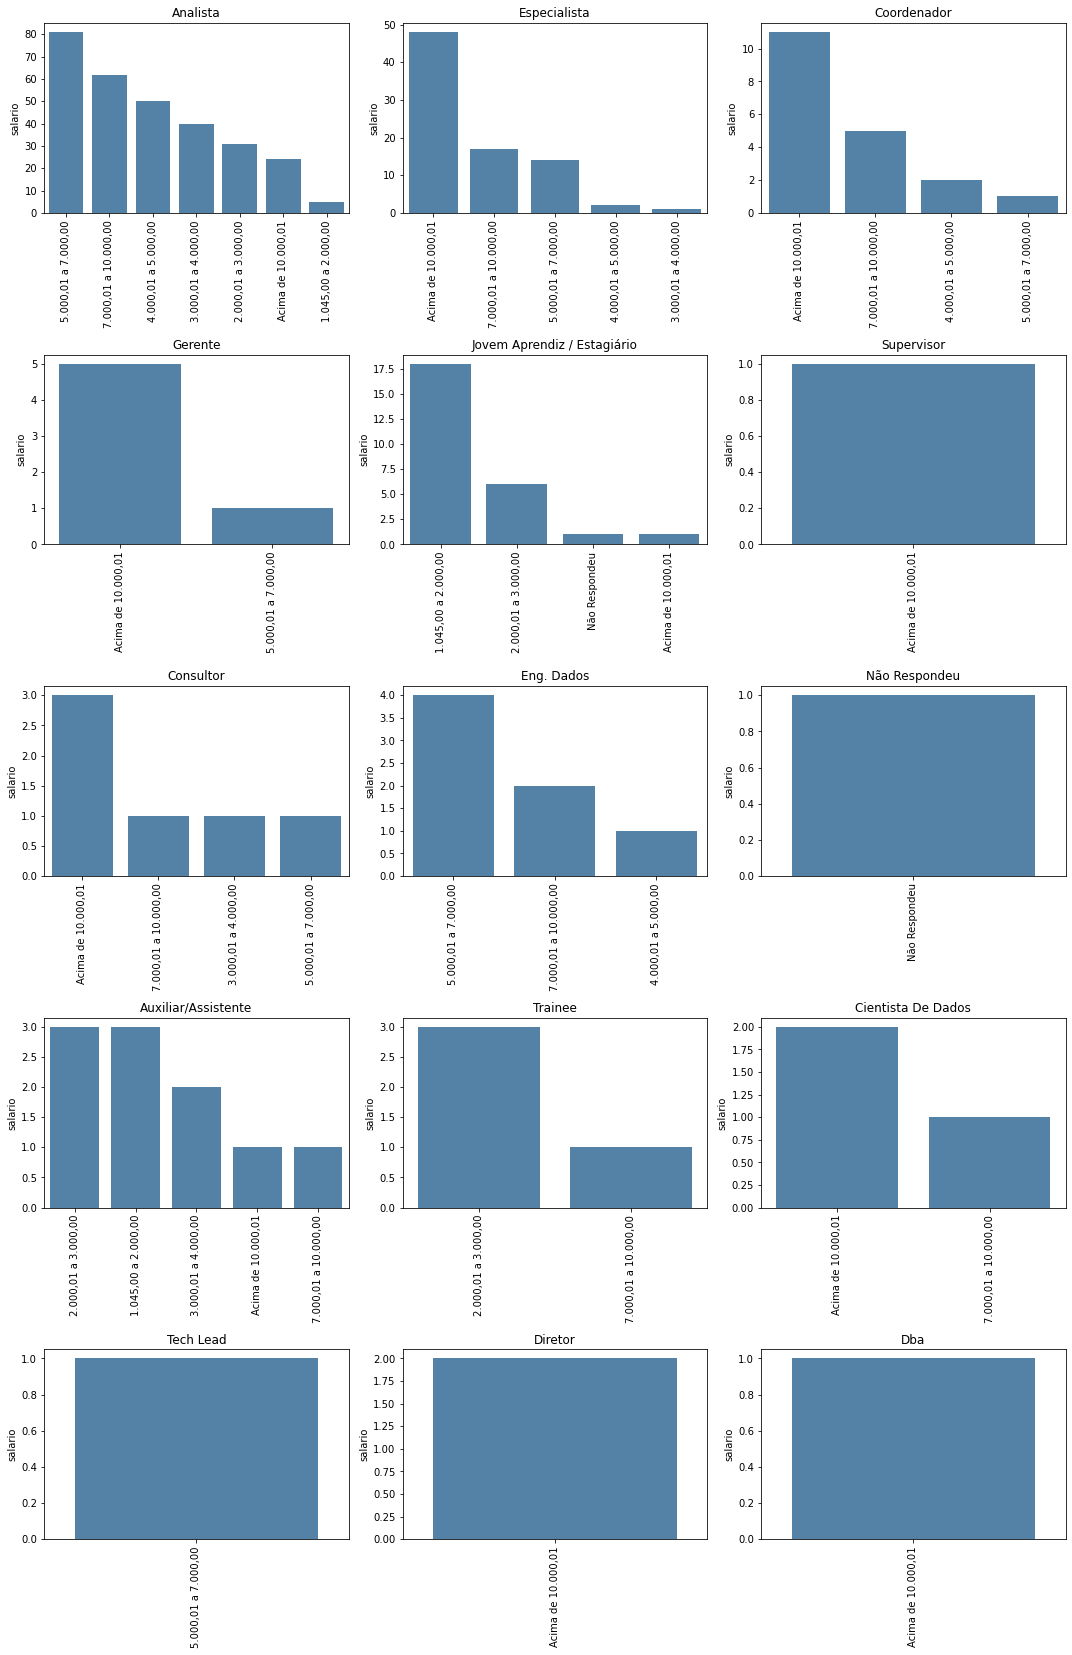

In [75]:
grafico(df, 'ocupacao', 15, 40, 9, 3)

Especialistas, coordenadores, gerentes, consultores e cientistas de dados são os grupos que possuem a faixa salarial mais alta da pesquisa, ou seja, acima de 10 mil.

Os analistas, maior quantidade de respondente, recebem, majoritariamente, entre 5 e 7mil. Segunda maior quantidade é de 7 a 10 mil e terceiro maior, de 4 a 5 mil. Notamos poucos analistas com faixa salarial acima de 10 mil.

## MODELO DE TRABALHO

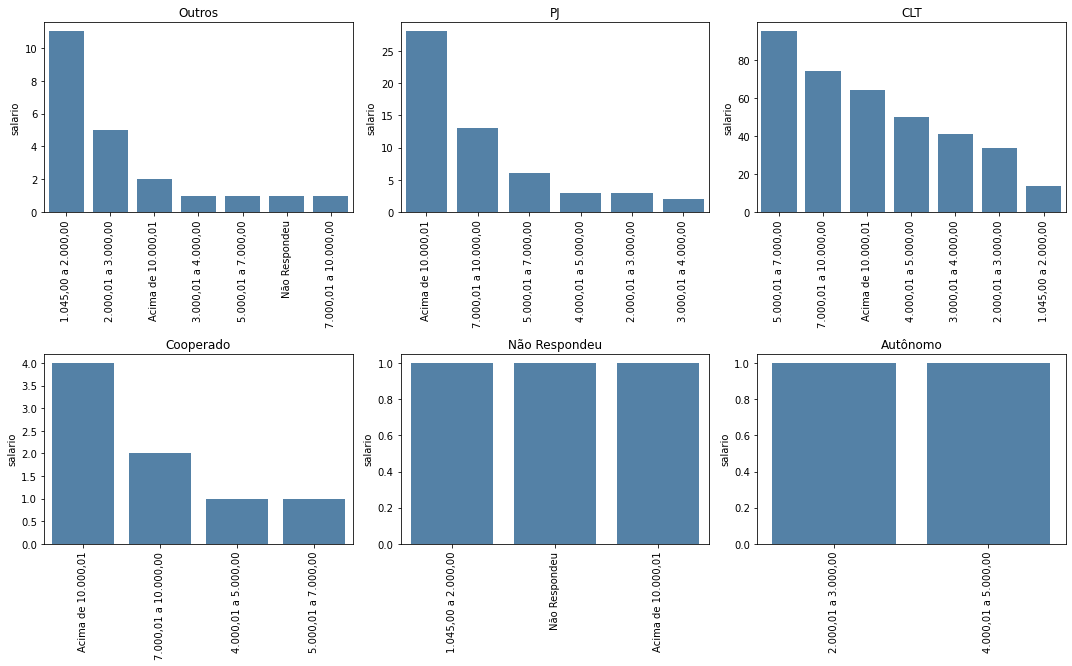

In [76]:
grafico(df, 'model_trab', 15, 40, 9, 3)

No gráfico podemos notar que pessoas que trabalham sob regime PJ se concentram nas maiores faixas salariais (observamos os quatro maiores grupos salariais nestes respondentes).

No regime CLT, a maior quantidade de respondentes recebem entre 5 e 7k, seguido por 7 a 10 e acima de 10k.

## QT. COLABORADORES

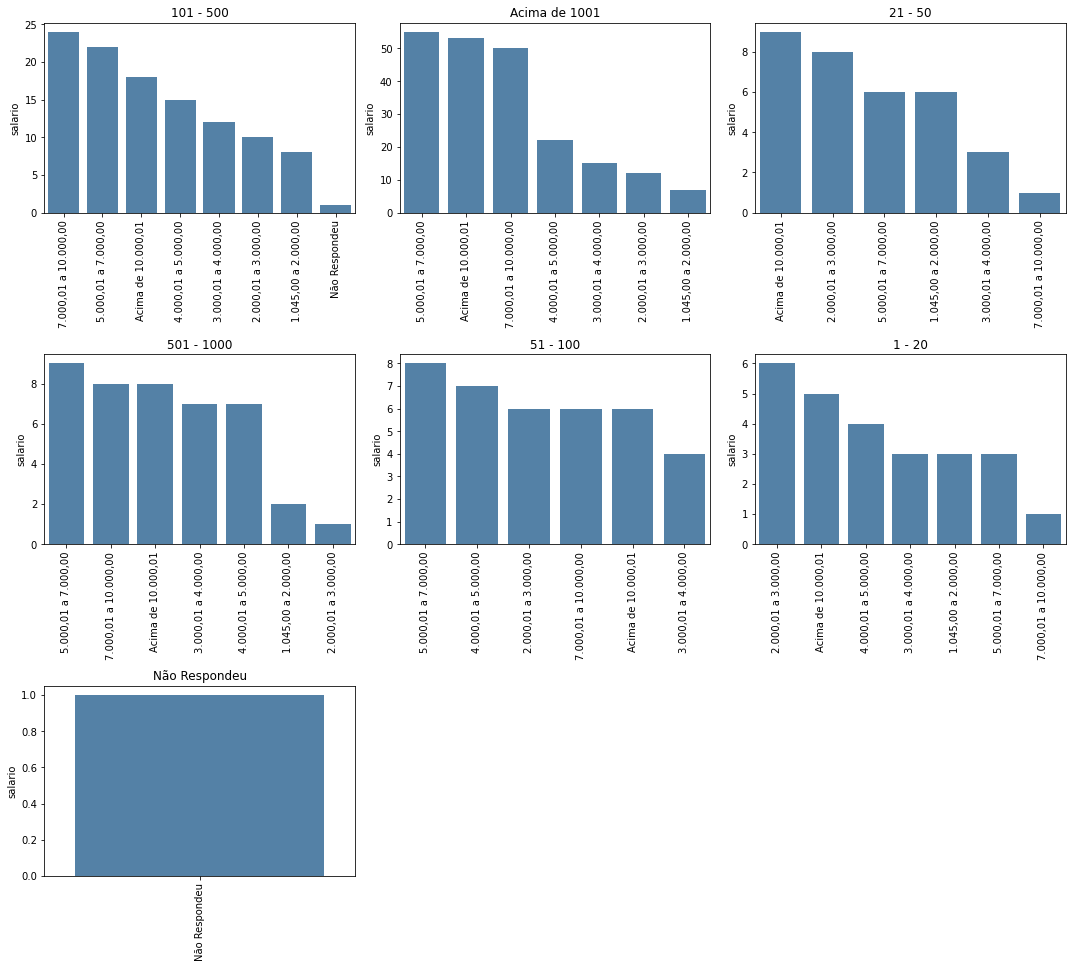

In [77]:
grafico(df, 'colab', 15, 40, 9, 3)

## SETOR

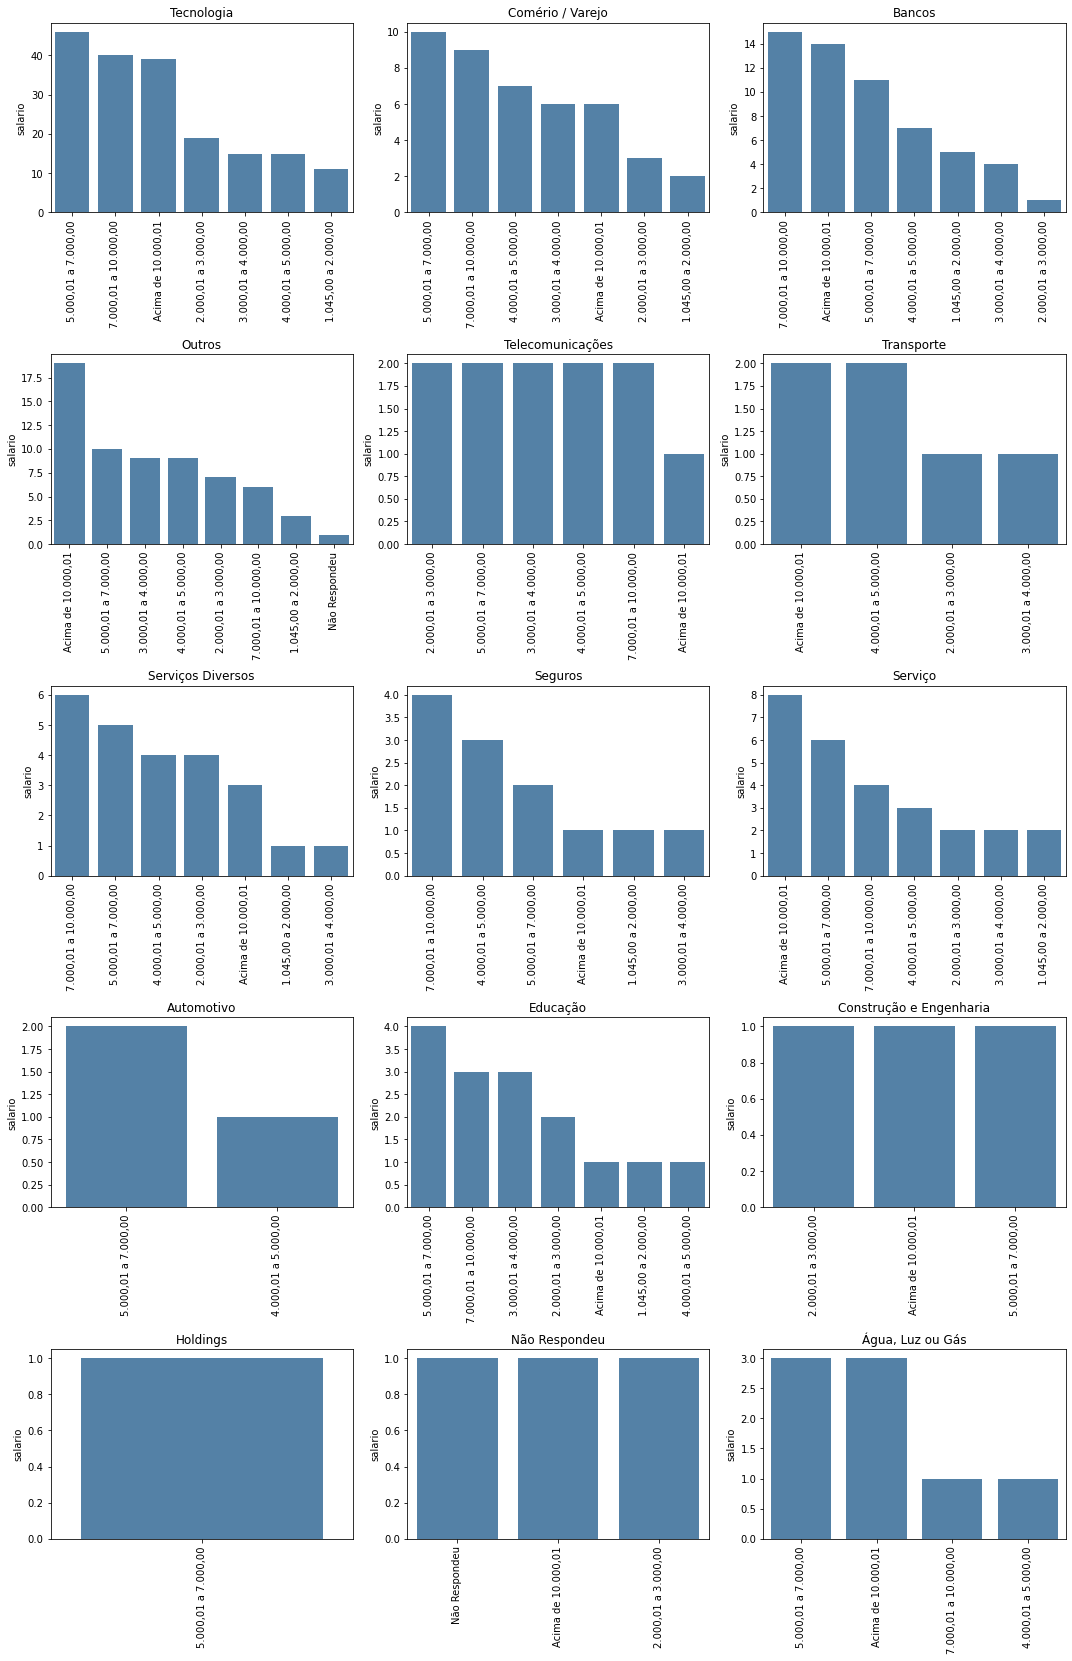

In [78]:
grafico(df, 'setor', 15, 40, 9, 3)